In [1]:
# dependencies for google colab
! pip install langchain_google_genai
! pip install python-dotenv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.6 MB/s eta 0:00:00


In [21]:
import requests
from PIL import Image
import torch
#importing models
from transformers import BlipProcessor, BlipForConditionalGeneration
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv
import os
import re

from langchain import PromptTemplate
from langchain.chains import LLMChain
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate

from diffusers import DiffusionPipeline


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
Hugging_face_token=os.getenv('hugging_face_token')

In [ ]:
! huggingface-cli login --token $Hugging_face_token


In [3]:

# from transformers import Blip2Processor, Blip2ForConditionalGeneration
# import torch

# device = "cuda" if torch.cuda.is_available() else "cpu"

# processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
# model = Blip2ForConditionalGeneration.from_pretrained(
#     "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
# )
# model.to(device)
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

# inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

# generated_ids = model.generate(**inputs)
# generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
# print(generated_text)

In [4]:
# loading image captionning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")


# loading stable diffusion
pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")
pipe = pipe.to(device, torch.float16)




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
img_url = 'https://media.istockphoto.com/id/689616366/vector/kids-doodles-hand-drawing-unicorn-running-on-rainbow.jpg?s=1024x1024&w=is&k=20&c=lRb6FO8AyraMpQ8dfyuYcT51wCQJMKkUWbK8KWTw-is='
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

In [6]:
# # conditional image captioning
# text = "a photography of"
# inputs = processor(raw_image, text, return_tensors="pt").to("cuda")

# out = model.generate(**inputs).
# print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt").to(device, torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a drawing of a unicorn on a rainbow with a sun in the background


In [7]:
model_prompt=processor.decode(out[0], skip_special_tokens=True)

In [8]:
model_prompt

'a drawing of a unicorn on a rainbow with a sun in the background'

In [9]:
# Load environment variables.
load_dotenv()

# Set the model name for our LLMs.
GEMINI_MODEL = "gemini-1.5-flash"

# Store the API key in a variable.
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

In [10]:
llm = ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

In [12]:
requirement = input("Please input your requirement for the story: ")

Please input your requirement for the story: short, for an 8 year old child, exciting


In [13]:
query =f' Write a short story based on the content of {model_prompt} and that fits the following requirements: {requirement}'

In [14]:
result = llm.invoke(query)
print(result.content)

content='Sparkle the unicorn galloped across the rainbow bridge!  It shimmered and shone, every color a delicious candy-flavored surprise.  The sun, a giant golden lollipop in the sky, warmed Sparkle\'s fluffy white mane.  \n\nSuddenly, WHOOSH!  A mischievous cloud, shaped like a grumpy badger, tried to snatch Sparkle\'s rainbow!  Sparkle, brave and fast, kicked her silver hooves and zoomed even faster.  She leaped over giggling, rainbow-colored butterflies and dodged playful, bouncing raindrops.\n\nThe badger cloud grumbled, "I\'ll get you yet, Sparkle!"\n\nBut Sparkle, with a happy neigh, reached the end of the rainbow – a giant pot of glittery gold!  She dipped her horn in, showering herself in sparkling magic.  The badger cloud, covered in glitter, giggled and floated away, promising to play another day.  Sparkle, feeling magical and happy, knew this was just the beginning of her amazing rainbow adventure!\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason

In [15]:
print(result.content)

Sparkle the unicorn galloped across the rainbow bridge!  It shimmered and shone, every color a delicious candy-flavored surprise.  The sun, a giant golden lollipop in the sky, warmed Sparkle's fluffy white mane.  

Suddenly, WHOOSH!  A mischievous cloud, shaped like a grumpy badger, tried to snatch Sparkle's rainbow!  Sparkle, brave and fast, kicked her silver hooves and zoomed even faster.  She leaped over giggling, rainbow-colored butterflies and dodged playful, bouncing raindrops.

The badger cloud grumbled, "I'll get you yet, Sparkle!"

But Sparkle, with a happy neigh, reached the end of the rainbow – a giant pot of glittery gold!  She dipped her horn in, showering herself in sparkling magic.  The badger cloud, covered in glitter, giggled and floated away, promising to play another day.  Sparkle, feeling magical and happy, knew this was just the beginning of her amazing rainbow adventure!



In [20]:
story= result.content.replace('\n',' ')
story

'Sparkle the unicorn galloped across the rainbow bridge!  It shimmered and shone, every color a delicious candy-flavored surprise.  The sun, a giant golden lollipop in the sky, warmed Sparkle\'s fluffy white mane.    Suddenly, WHOOSH!  A mischievous cloud, shaped like a grumpy badger, tried to snatch Sparkle\'s rainbow!  Sparkle, brave and fast, kicked her silver hooves and zoomed even faster.  She leaped over giggling, rainbow-colored butterflies and dodged playful, bouncing raindrops.  The badger cloud grumbled, "I\'ll get you yet, Sparkle!"  But Sparkle, with a happy neigh, reached the end of the rainbow – a giant pot of glittery gold!  She dipped her horn in, showering herself in sparkling magic.  The badger cloud, covered in glitter, giggled and floated away, promising to play another day.  Sparkle, feeling magical and happy, knew this was just the beginning of her amazing rainbow adventure! '

In [48]:
image_prompt_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

schemas=[
    ResponseSchema(name='prompt 1', description='the prompt'),
    ResponseSchema(name='prompt 2', description='the prompt'),
    ResponseSchema(name='prompt 3', description='the prompt'),
    ResponseSchema(name='prompt 4', description='the prompt')
]

parser=StructuredOutputParser.from_response_schemas(schemas)
instructions=parser.get_format_instructions()

In [49]:
query = f' based on this story: {story}. Create 4 prompts for stable diffusion that tells the story in a linear fashion with a consistant drawing style. The prompts have to be a maximum of 77 words long'+ '\n\n'+instructions

In [50]:
result=image_prompt_llm.invoke(query)
result

AIMessage(content='```json\n{\n  "prompt 1": "A majestic white unicorn, Sparkle, gallops across a vibrant rainbow bridge, candy-colored, sun a giant lollipop, fluffy mane glowing, highly detailed, whimsical style, art by Studio Ghibli",\n  "prompt 2": "A grumpy badger-shaped cloud swoops down to snatch the rainbow from Sparkle, who kicks her silver hooves, speeding away, rainbow butterflies and bouncing raindrops surround her, whimsical, Studio Ghibli style, highly detailed",\n  "prompt 3": "Sparkle, the unicorn, leaps and dodges, the badger cloud grumbling, \\"I\'ll get you yet!\\"  Rainbow background, dynamic action pose, whimsical style, Studio Ghibli art, highly detailed, vibrant colors",\n  "prompt 4": "Sparkle reaches a giant pot of glittery gold at the rainbow\'s end, dips her horn, showering herself in magic, the glitter-covered badger cloud giggles, floating away, happy ending, whimsical, Studio Ghibli style, highly detailed"\n}\n```\n', additional_kwargs={}, response_metadata

In [51]:
image_prompts = parser.parse(result.content)

In [52]:
image_prompts

{'prompt 1': 'A majestic white unicorn, Sparkle, gallops across a vibrant rainbow bridge, candy-colored, sun a giant lollipop, fluffy mane glowing, highly detailed, whimsical style, art by Studio Ghibli',
 'prompt 2': 'A grumpy badger-shaped cloud swoops down to snatch the rainbow from Sparkle, who kicks her silver hooves, speeding away, rainbow butterflies and bouncing raindrops surround her, whimsical, Studio Ghibli style, highly detailed',
 'prompt 3': 'Sparkle, the unicorn, leaps and dodges, the badger cloud grumbling, "I\'ll get you yet!"  Rainbow background, dynamic action pose, whimsical style, Studio Ghibli art, highly detailed, vibrant colors',
 'prompt 4': "Sparkle reaches a giant pot of glittery gold at the rainbow's end, dips her horn, showering herself in magic, the glitter-covered badger cloud giggles, floating away, happy ending, whimsical, Studio Ghibli style, highly detailed"}

In [55]:
# prompt = result["text"]
images=[]
for i in image_prompts.keys():

  image = pipe(image_prompts[i]).images[0]
  images.append(image)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

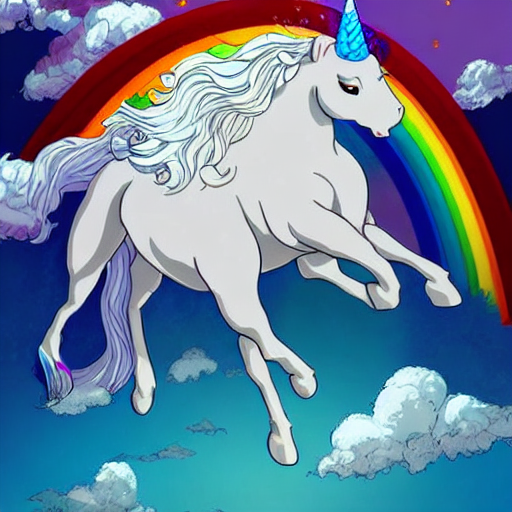

In [56]:
images[0]

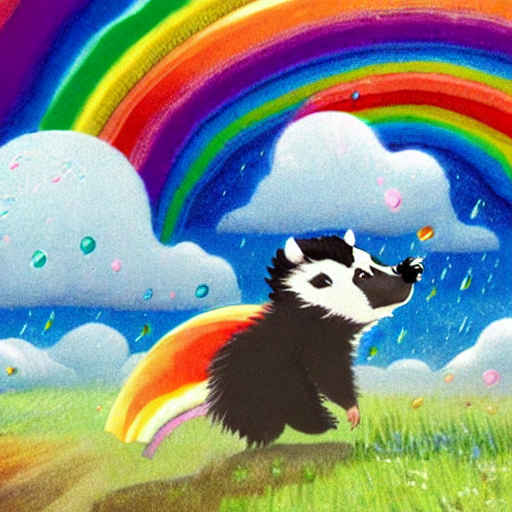

In [57]:
images[1]

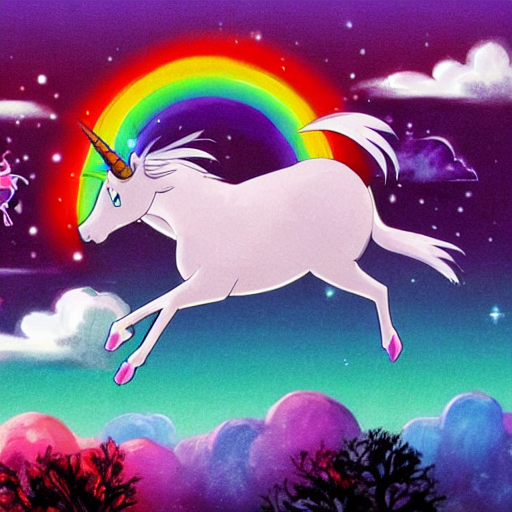

In [58]:
images[2]

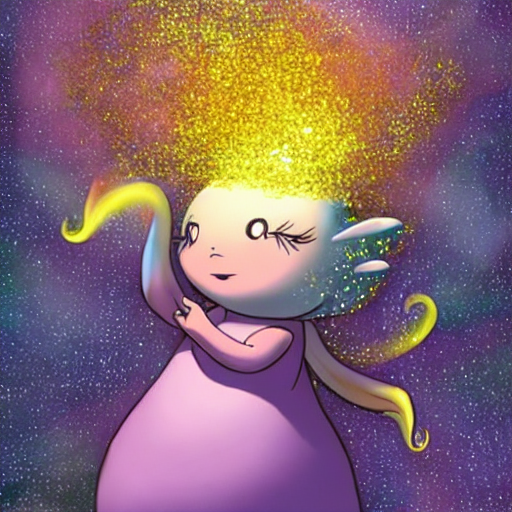

In [59]:
images[3]

In [ ]:
# ouputs:
generated_story=result["text"]
generated_image=image
generated_image